<hr style="height:10px"> 
 
<div class='container2'>
	<div style='padding: 0 7em 2em 0em;'>
	<h1>Trabalho de Inteligência Artificial</h1>
    <h3> <a href="https://github.com/amandakouchi">Amanda Kouchi</a> &#x25CF; <a href="https://github.com/biarog">Beatriz Rogers</a> &#x25CF; <a href="https://github.com/matteoavan">Matteo Savan</a> &#x25CF; <a href="https://github.com/RaulYKomai">Raul Y. Komai</a>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Algoritmos e Avaliação em Agrupamento</h2>

## Introdução

Neste *notebook*, será feito o uso de três algoritmos de agrupamento para podermos analisar cada um dos algorítmos e seus usos ideais. O banco de dados utilizado foi providenciado pela nossa Profª Drª Katti Facelli.

Os três algoritmos que faremos uso neste estudo são os seguintes: K-médias, Single-Link e Complete-Link.

---

## Recursos Necessários

Para este *notebook*, deve ser utilizado o `Python 3.6` ou superior com as seguintes bibliotecas externas, que deverão ser instaladas:

* [`matplotlib`](versão 3.9.2 ou superior): construção e exibição de gráficos variados
* [`numpy`](versão 2.1 ou superior): manipulação de dados em formato de vetores e matrizes
* [`pandas`](versão 2.2.2 ou superior): manipulação de dados em formato de tabelas
* [`sklearn`](versão x.x ou superior): completar
* [`seaborn`]versão x.x ou superior): completar

A biblioteca [`os`](https://docs.python.org/3/library/os.html), para realizar tarefas específicas ao Sistema Operacional, também será utilizada. Por fazer parte da [Biblioteca Padrão de Python](https://docs.python.org/pt-br/3/library/), sua instalação não é necessária.

Serão utilizados também os conjuntos de dados disponibilizados junto com este *notebook*, que se encontram no diretório `datasets`, em formato de arquivo `.txt`.

In [201]:
## Imports
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn import cluster 
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
import seaborn as sns
import sys

%matplotlib inline

DATASETS_DIR = 'datasets'

In [202]:
## Função auxiliar para carregar dados
def load_dataset(dataset_name):
    dataset = pd.read_csv(os.path.join(DATASETS_DIR, dataset_name+'.txt'), sep='\t', index_col = 0)
    return dataset

In [203]:
## Função auxiliar para plottar os dados de entrada
def plot_entry_data(data) -> None:
    X = data[['d1', 'd2']]
    plt.scatter(X["d1"],X["d2"], c="red")
    plt.xlabel("d1")
    plt.ylabel("d2")
    plt.show()

In [ ]:
## Funcao auxiliar para definir o dataframe apos a agregacao
def create_df(data, clusters):
    df = pd.DataFrame(data)
    df.columns = ["d1","d2"]
    df["cluster"] = clusters
    
    return df

In [204]:
## Função auxiliar para plottar após funcao de agregacao
def plot_grouped_data(df, n_clusters) -> None:
    cores = sns.color_palette()[0:n_clusters]
    df = df.sort_values("sample_label")
    sns.scatterplot(data = df, x=df["d1"], y=df["d2"], hue=df["cluster"], palette=cores)
    plt.show()

In [ ]:
## Funcao auxiliar de exportar arquivo
def export_dataframe(df, n_group, n_arquivo) -> None :
    select = ['sample_label', 'cluster']
    select = [x for x in df.columns if x in select]
    export = df[select]
    export.to_csv(n_arquivo + '_' + n_group + '.csv')

---
## K-médias

Adicionar descrição do processo de kmédias

In [205]:
## Entrada de dados
maxiter = 100000
k = 10
nome_arquivo = 'monkey'

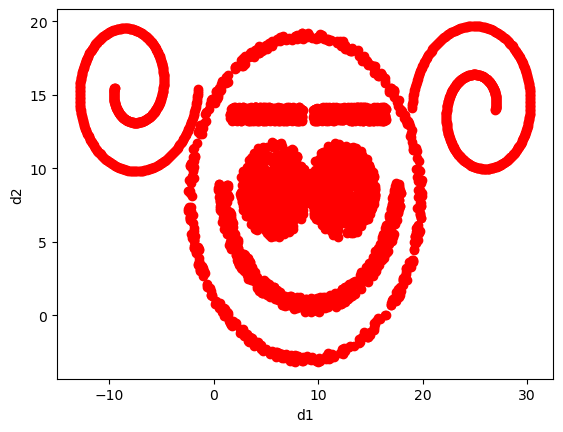

In [206]:
dados = load_dataset(nome_arquivo)
plot_entry_data(data=dados)

In [207]:
## Iniciar centróides
def initiate_centroids(k,dset):
    centroides = dset.sample(k)
    return centroides

np.random.seed(86)
centroids = initiate_centroids(k,X)

4000 [7 1 4 ... 2 2 2]


In [ ]:
## Função de distância
def rsserr(a,b):
    return np.square(np.sum((a-b)**2)) 

In [ ]:
## Atribuição de das amostras aos centróides
def centroid_assignation(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

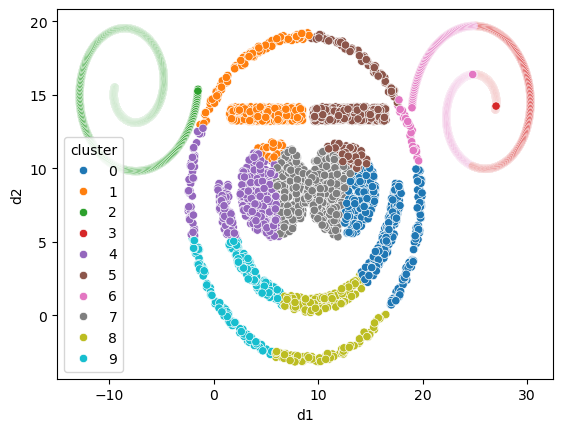

In [208]:
## Plotar após k-médias
df = pd.DataFrame(X)
df.columns = ['d1','d2', 'centroid', 'error']
cores = sns.color_palette()[0:k]
sns.scatterplot(data = df, x=df["d1"], y=df["d2"], hue=df["centroid"], palette=cores)
plt.show()

In [209]:
## Exportar arquivo
select_ = ['sample_label', 'centroid']
select = [x for x in df.columns if x in select_]
export = df[select]
export.to_csv(nome_arquivo + '.csv')

---
## Single-Link

In [210]:
## Entrada de dados
numero_clusters = 10
nome_arquivo = 'teste'

In [ ]:
## Carregando dados e plottando grafico inicial
dados = load_dataset(nome_arquivo)
plot_entry_data(data=dados)

In [ ]:
## Cálculo Matriz de Distância
matrix_despacial = distance_matrix(x=dados.values, y=dados.values)
matrix_base = np.full((len(matrix_despacial), len(matrix_despacial[0])), 1)

In [ ]:
## Função de Single Link
def single_link(m_distancias:np, n_clusters:int):
    single = [-1]*len(dados)
    counter:int = 0
    cluster_id:int = -1
    for iter in range(len(m_distancias) - n_clusters):
        min:int = sys.maxsize
        line:int = 0
        column:int = 0
        
        cluster:bool = True
        
        for idx_x, x in enumerate(m_distancias):
            for idx_y, y in enumerate(x):
                if y < min and y > 0:
                    min = y
                    line = idx_x
                    column = idx_y

        if single[line] < 0 and single[column] < 0:
            cluster = False
        
        if cluster:
            
            if single[line] >= 0:
                cluster_id = -single[line] -1
            elif single[column] >= 0:
                cluster_id = -single[column] -1
            
            m_distancias[column][line] = m_distancias[line][column] = cluster_id
            
            idx_column = idx_line = -1
            for idx_n, n in enumerate(single):
                if n == single[column] and idx_n != column and n > -1:
                    idx_column = idx_n
                    single[idx_column] = -cluster_id - 1
                    m_distancias[idx_column][column] = m_distancias[column][idx_column] = cluster_id
                    m_distancias[idx_column][line] = m_distancias[line][idx_column] = cluster_id
                elif n == single[line] and idx_n != line and n > -1:
                    idx_line = idx_n
                    single[idx_line] = -cluster_id - 1
                    m_distancias[idx_line][column] = m_distancias[column][idx_line] = cluster_id
                    m_distancias[idx_line][line] = m_distancias[line][idx_line] = cluster_id
                if idx_column > -1 and idx_line > -1:
                    m_distancias[idx_line][idx_column] = m_distancias[idx_column][idx_line] = cluster_id
            
            single[line] = single[column] = -cluster_id - 1

        else :
            m_distancias[column][line] = m_distancias[line][column] = -counter - 1
            single[line] = single[column] = counter
            counter += 1

        for idx_x, x in enumerate(m_distancias[line]):
            if m_distancias[line][idx_x] <= m_distancias[column][idx_x] and m_distancias[column][idx_x] > 0:
                m_distancias[column][idx_x] = m_distancias[idx_x][column] = x
            elif m_distancias[line][idx_x] > m_distancias[column][idx_x] and m_distancias[line][idx_x] > 0:
                m_distancias[line][idx_x] = m_distancias[idx_x][line] = m_distancias[idx_x][column]

    for idx_n, n in enumerate(single):
        if n == -1:
            single[idx_n] = max(single) + 1
    
    return single

In [ ]:
single = single_link(matrix_despacial, numero_clusters)
plot_grouped_data(dados=dados, n_clusters=numero_clusters, clusters=single)

In [ ]:
df = create_df(dados, numero_clusters)
plot_grouped_data(df, numero_clusters)
export_dataframe(df, 'single_link', nome_arquivo)

---
## Complete-Link

In [326]:
## Entrada de dados
numero_clusters = 10
nome_arquivo = 'monkey'

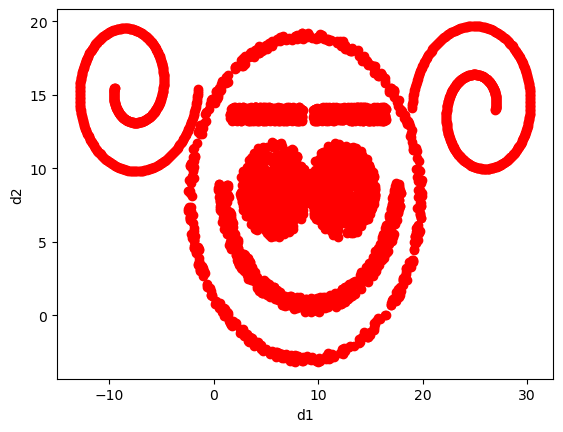

In [327]:
## Carregando dados e plottando grafico inicial
dados = load_dataset(nome_arquivo)
plot_entry_data(data=dados)

In [328]:
## Cálculo Matriz de Distância
matrix_despacial = distance_matrix(x=dados.values, y=dados.values)
matrix_base = np.full((len(matrix_despacial), len(matrix_despacial[0])), 1)

In [329]:
## Função de Complete Link
def complete_link(m_distancias:np, n_clusters:int):
    complete = [-1]*len(dados)
    counter:int = 0
    cluster_id:int = -1
    for iter in range(len(m_distancias) - n_clusters):
        min:int = sys.maxsize
        line:int = 0
        column:int = 0
        
        cluster:bool = True
        
        shortest_dist = np.min(m_distancias[m_distancias>0])
        line = np.where(m_distancias == shortest_dist)[0][0]
        column = np.where(m_distancias == shortest_dist)[1][0]
        #for idx_x, x in enumerate(m_distancias):
        #    for idx_y, y in enumerate(x):
        #        if y < min and y > 0:
        #            min = y
        #            line = idx_x
        #            column = idx_y

        #print("sd: ", shortest_dist, "min: ", min)
        
        #print("c1(linha): ", cluster1, "c2(coluna): ", cluster2)
        #print("---linha : ", line, "---coluna : ", column)

        if complete[line] < 0 and complete[column] < 0:
            cluster = False
        
        if cluster:
            
            if complete[line] >= 0:
                cluster_id = -complete[line] -1
            elif complete[column] >= 0:
                cluster_id = -complete[column] -1
            
            m_distancias[column][line] = m_distancias[line][column] = cluster_id
            
            idx_column = idx_line = -1
            for idx_n, n in enumerate(complete):
                if n == complete[column] and idx_n != column and n > -1:
                    idx_column = idx_n
                    complete[idx_column] = -cluster_id - 1
                    m_distancias[idx_column][column] = m_distancias[column][idx_column] = cluster_id
                    m_distancias[idx_column][line] = m_distancias[line][idx_column] = cluster_id
                elif n == complete[line] and idx_n != line and n > -1:
                    idx_line = idx_n
                    complete[idx_line] = -cluster_id - 1
                    m_distancias[idx_line][column] = m_distancias[column][idx_line] = cluster_id
                    m_distancias[idx_line][line] = m_distancias[line][idx_line] = cluster_id
                if idx_column > -1 and idx_line > -1:
                    m_distancias[idx_line][idx_column] = m_distancias[idx_column][idx_line] = cluster_id
            
            complete[line] = complete[column] = -cluster_id - 1

        else :
            m_distancias[column][line] = m_distancias[line][column] = -counter - 1
            complete[line] = complete[column] = counter
            counter += 1

        for idx_x, x in enumerate(m_distancias[line]):
            if m_distancias[line][idx_x] >= m_distancias[column][idx_x] and m_distancias[column][idx_x] > 0:
                m_distancias[column][idx_x] = m_distancias[idx_x][column] = x
            elif m_distancias[line][idx_x] < m_distancias[column][idx_x] and m_distancias[line][idx_x] > 0:
                m_distancias[line][idx_x] = m_distancias[idx_x][line] = m_distancias[idx_x][column]
        print(iter)

    for idx_n, n in enumerate(complete):
        if n == -1:
            complete[idx_n] = max(complete) + 1
    
    return complete

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

C:\Users\beatr\AppData\Local\Temp\ipykernel_26088\825927636.py:8: UserWarning: 
The palette list has fewer values (10) than needed (448) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data = df, x=df["d1"], y=df["d2"], hue=df["cluster"], palette=cores)


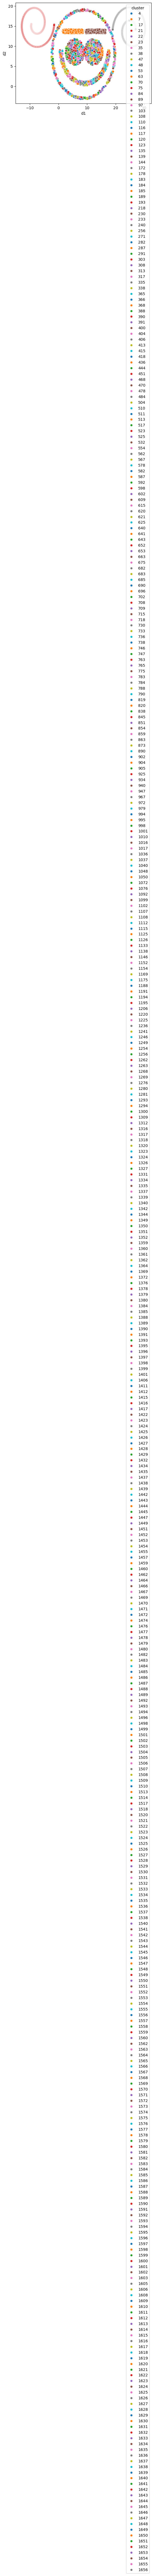

In [330]:
complete = complete_link(matrix_despacial, numero_clusters)
plot_grouped_data(dados=dados, n_clusters=numero_clusters, clusters=complete)

In [ ]:
df = create_df(dados, numero_clusters)
plot_grouped_data(df, numero_clusters)
export_dataframe(df, 'complete_link', nome_arquivo)

---
## S-rand

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.cluster import adjusted_rand_score

# abaixo é o que devemos fazer para um arquivo mas devemos fazer para os outros:

# pegando os dados:
resultado_correto = open('C:/Users/matte/OneDrive/UFSCAR/2024_1/IA/trabalho de ia/resultado_real.clu', 'r') #abrindo o arquivo para leitura. Aqui tem o arquivo com o agrupamento real
vetor_resultado_correto = []
resultado_alcancado = open('C:/Users/matte/OneDrive/UFSCAR/2024_1/IA/trabalho de ia/resultado_raul.clu', 'r') #abrindo o arquivo para leitura. Aqui tem o arquivo com o agrupamento que conseguimos em algum dos agrupamento que implementamos
vetor_resultado_alcancado = []

conteudo = resultado_alcancado.readline() #aqui lemos só para não pegar aquela primeira linha com a legenda das colunas

# coletando os dados do arquivo do que se espera:
while(True):
    conteudo = resultado_correto.readline() #lê linha

    if (not conteudo): #se alcançar o final do arquivo
        break #pare

    numero_cluster = conteudo[len(conteudo)-2] #descontamos 1 do \n e descontamos 1 para garantir a posição correta
    vetor_resultado_correto.append(numero_cluster)

# coletando os dados do arquivo do que se alcançou:
while(True):
    conteudo = resultado_alcancado.readline()
    if (not conteudo):
        break
    numero_cluster = conteudo[len(conteudo)-2]  
    vetor_resultado_alcancado.append(numero_cluster)

#para testar o vetores criados:
#print("PRINTANDO OS VETORES:")
#print(vetor_resultado_correto)
#print(vetor_resultado_alcancado)

rand = adjusted_rand_score(vetor_resultado_correto, vetor_resultado_alcancado)
print("indice Rand alcançado: " + str(rand))

---
## Conclusão